In [15]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import Random Forest Model classifier
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
import seaborn as sns
pd.set_option('max_columns', None)
%matplotlib inline

In [16]:
# Open calendar and listings data
boston_calendar = pd.read_csv("boston_airbnb_data/calendar.csv")
boston_listings = pd.read_csv("boston_airbnb_data/listings.csv")

In [17]:
# Drop price column because we don't need it for our analysis
boston_calendar = boston_calendar.drop('price', axis=1)
# Get one column for each variable on for t(true) and one for f(false)
boston_calendar = pd.concat([boston_calendar.drop('available', axis=1), pd.get_dummies(boston_calendar['available'], prefix='available', prefix_sep='_')], axis=1)
# Group by each list id by adding the number of times each list_id is available and unavailable
boston_occupation = boston_calendar.groupby("listing_id").sum()
# Add a column with the occupancy percentage, which is the number of days occupied divided by the total number of days registered
boston_occupation["occupation_percentage"] = boston_occupation["available_f"]*100/(boston_occupation["available_f"]+boston_occupation["available_t"])

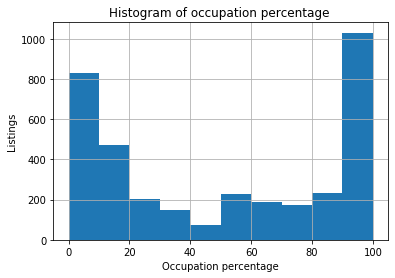

In [18]:
# explore an balance ocupation percentage and chage to categoric
boston_occupation_hist = boston_occupation["occupation_percentage"].hist()
boston_occupation_hist.set_xlabel("Occupation percentage")
boston_occupation_hist.set_ylabel("Listings")
boston_occupation_hist.title.set_text('Histogram of occupation percentage ')

In [19]:
def percentage_to_categorical(value):
    value = float(value)
    if value >= 0 and value <= 33.3:
        return 1
    elif value > 33.3 and value <= 66.6:
        return 2
    elif value > 66.6 and value <= 100:
        return 3

In [20]:
# Apply function
boston_occupation["occupation_percentage_categoric"] = boston_occupation["occupation_percentage"].apply(percentage_to_categorical)

In [21]:
# Drop columns will no longer be used
boston_occupation = boston_occupation.drop(["available_f","available_t","occupation_percentage"], axis=1)

In [22]:
# Create a consolidate dataframe with all the listings data and the ocupation percentage
df = pd.merge(boston_listings, boston_occupation,left_on="id",right_on="listing_id", how="inner")

In [23]:
boston_sentiment_comments = pd.read_csv("mean_sentiment_comments.csv")
boston_sentiment_comments.columns = ['listing_id', 'reviews_sentiment_positive', 'reviews_sentiment_negative',
                                     'reviews_sentiment_neutral','reviews_sentiment_mixed','number_sentiment_reviews']

In [24]:
df = pd.merge(df, boston_sentiment_comments,left_on="id",right_on="listing_id", how="inner")

In [25]:
df.describe(include="all")

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,occupation_percentage_categoric,listing_id,reviews_sentiment_positive,reviews_sentiment_negative,reviews_sentiment_neutral,reviews_sentiment_mixed,number_sentiment_reviews
count,2.829000e+03,2829,2.829000e+03,2829,2829,2698,2124,2829,2829,1828,1399,1924,1821,1749,2056,2339,2339,2829,2339,2.829000e+03,2829,2829,2829,2820,1931,2593,2593,2593,2829,2829,2829,2579,2829.000000,2829.000000,2829,2829,2829,2829,2418,2829,0.0,2827,2829,2804,2823,2829,2829,2829,2829.000000,2829.000000,2829,2827,2829,2829.000000,2817.000000,2821.000000,2823.000000,2829,2829,54.000000,2829,827,801,1136,2011,2829.000000,2829,2829.000000,2.829000e+03,2829,0.0,2829.000000,2829.000000,2829.000000,2829.000000,2829,2829.00000,2829,2829,2772.000000,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,2829,0.0,0.0,2829,2829,2829,2829,2829.000000,2829.000000,2829.000000,2.829000e+03,2829.000000,2829.000000,2829.000000,2829.000000,2829.000000
unique,NaN,2829,NaN,1,2776,2497,1952,2734,1,1512,1126,1621,1563,1438,1694,2339,2339,2829,2339,NaN,1776,1121,1143,146,1098,4,46,71,2,1770,1770,49,NaN,NaN,65,2,2,1096,29,25,NaN,33,1,40,3,34,1,1,NaN,NaN,2,12,3,NaN,NaN,NaN,NaN,5,2501,NaN,294,236,276,50,74,NaN,47,NaN,NaN,34,NaN,NaN,NaN,NaN,NaN,1,NaN,975,404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,2,4,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,https://www.airbnb.com/rooms/6844012,NaN,2016-09-07,Lux 2BR by Fenway w/WiFi,"The unit is stylishly designed for comfort, va...",The studio's kitchenette comes equipped with a...,Private room in a HOSTEL exclusive for Airbnb ...,none,Conveniently bordering the neighborhoods of th...,Although we do not allow pets in our apartment...,Located less than a five minute walk to Back B...,"You have access to the entire apartment, and a...",Need more towels? A restaurant recommendation?...,House Rules 1. Check-in is 4 pm local time. If...,https://a2.muscache.com/im/pictures/45726/13d0...,https://a0.muscache.com/im/pictures/101335837/...,https://a2.muscache.com/im/pictures/90188730/9...,https://a2.muscache.com/im/pictures/b3e20d2d-c...,NaN,https://www.airbnb.com/users/show/25188,Seamless,2009-07-10,"Boston, Massachusetts, United States",ABOUT US:\r\n\r\nSeamlessTransition is a full-...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/25188/profile...,https://a2.muscache.com/im/users/25188/profile...,Allston-Brighton,NaN,NaN,"['email', 'phone', 'reviews', 'jumio']",t,t,"Beacon Street, Boston, MA 02116, United States",Allston-Brighton,Jamaica Plain,NaN,Boston,MA,02116,Boston,"Boston, MA",US,United States,NaN,NaN,t,Apartment,Entire h

Column analysis

column: id, dimension: property, strategy: drop - id of the listing <br>
column: listing_url, dimension: none, strategy: drop - out of scope for this analysis <br>
column: scrape_id, dimension: none, strategy: drop - out of scope for this analysis <br>
column: last_scraped, dimension: none, strategy: drop - out of scope for this analysis <br>
column: name, dimension: property, strategy: drop - out of scope for this analysis <br>
column: summary, dimension: property, strategy: drop - out of scope for this analysis <br>
column: space, dimension: property, strategy: drop - out of scope for this analysis <br>
column: description, dimension: property, strategy: drop - out of scope for this analysis <br>
column: experiences_offered, dimension: property, strategy: drop - all values 0 <br>
column: neighborhood_overview, dimension: property, strategy: drop - out of scope for this analysis <br>
column: notes, dimension: property, strategy: drop - out of scope for this analysis <br>
column: transit, dimension: property, strategy: drop - out of scope for this analysis <br>
column: access, dimension: property, strategy: drop - out of scope for this analysis <br>
column: interaction, dimension: property, strategy: drop - out of scope for this analysis <br>
column: house_rules, dimension: property, strategy: drop - out of scope for this analysis <br>
column: thumbnail_url, dimension: property, strategy: drop - out of scope for this analysis <br>
column: medium_url, dimension: property, strategy: drop - out of scope for this analysis <br>
column: picture_url, dimension: property, strategy: drop - out of scope for this analysis <br>
column: xl_picture_url, dimension: property, strategy: drop - out of scope for this analysis <br>
column: host_id, dimension: host, strategy: drop - out of scope for this analysis <br>
column: host_url, dimension: host, strategy: drop - out of scope for this analysis <br>
column: host_name, dimension: host, strategy: drop - out of scope for this analysis <br>
column: host_since, dimension: host, strategy: drop - out of scope for this analysis <br>
column: host_location, dimension: host, strategy: transform to column host in city <br>
column: host_about, dimension: host, strategy: drop - out of scope for this analysis <br>
column: host_response_time, dimension: host, strategy: get dummies <br>
column: host_response_rate, dimension: host, strategy: clear characters to be continuous variable <br>
column: host_acceptance_rate, dimension: host, strategy: clear characters to be continuous variable <br>
column: host_is_superhost, dimension: host, strategy: get dummies <br>
column: host_thumbnail_url, dimension: host, strategy: drop - out of scope for this analysis <br>
column: host_picture_url, dimension: host, strategy: drop - out of scope for this analysis <br>
column: host_neighbourhood, dimension: host, strategy: drop - out of scope for this analysis <br>
column: host_listings_count, dimension: host, strategy: drop - redundant with the following column <br>
column: host_total_listings_count, dimension: host, strategy: none <br>
column: host_verifications, dimension: host, strategy: apply special function to get dummies <br>
column: host_has_profile_pic, dimension: host, strategy: get dummies <br>
column: host_identity_verified, dimension: host, strategy: get dummies <br>
column: street, dimension: property, strategy: drop - out of scope for this analysis <br>
column: neighbourhood, dimension: property, strategy: drop - out of scope for this analysis <br>
column: neighbourhood_cleansed, dimension: property, strategy: get dummies and experiment geographic variables <br>
column: neighbourhood_group_cleansed, dimension: property, strategy: drop - out of scope for this analysis <br>
column: city, dimension: property, strategy: use to filter only properties in Boston and then drop <br>
column: state, dimension: property, strategy: drop - out of scope for this analysis <br>
column: zipcode, dimension: property, strategy: get dummies and experiment geographic variables <br>
column: market, dimension: property, strategy: drop - out of scope for this analysis <br>
column: smart_location, dimension: property, strategy: drop - out of scope for this analysis <br>
column: country_code, dimension: property, strategy: drop - out of scope for this analysis <br>
column: country, dimension: property, strategy: drop - out of scope for this analysis <br>
column: latitude, dimension: property, strategy: drop - none and experiment geographic variables <br>
column: longitude, dimension: property, strategy: drop - none and experiment geographic variables<br>
column: is_location_exact, dimension: property, strategy: drop - out of scope for this analysis <br>
column: property_type, dimension: property, strategy: get dummies <br>
column: room_type, dimension: property, strategy: get dummies <br>
column: accommodates, dimension: property, strategy: none <br>
column: bathrooms, dimension: property, strategy: none <br>
column: bedrooms, dimension: property, strategy: none <br>
column: beds, dimension: property, strategy: none <br>
column: bed_type, dimension: property, strategy: get dummies <br>
column: amenities, dimension: property, strategy: apply special function to get dummies and use in final experiment <br>
column: square_feet, dimension: property, strategy: none <br>
column: price, dimension: property, strategy: clear characters to be continuous variable <br>
column: weekly_price, dimension: property, strategy: drop - is closely related to the price column <br>
column: monthly_price, dimension: property, strategy: drop - is closely related to the price column <br>
column: security_deposit, dimension: property, strategy: clear characters to be continuous variable <br>
column: cleaning_fee, dimension: property, strategy: clear characters to be continuous variable <br>
column: guests_included, dimension: property, strategy: none <br>
column: extra_people, dimension: property, strategy: clear characters to be continuous variable <br>
column: minimum_nights, dimension: property, strategy: none <br>
column: maximum_nights, dimension: property, strategy: none <br>
column: calendar_updated, dimension: property, strategy: drop - out of scope for this analysis <br>
column: has_availability, dimension: property, strategy: Drop because having availability is directly related to having a low occupation percentage <br>
column: availability_30, dimension: property, strategy: Drop because having availability is directly related to having a low occupation percentage <br>
column: availability_60, dimension: property, strategy: Drop because having availability is directly related to having a low occupation percentage <br>
column: availability_90, dimension: property, strategy: Drop because having availability is directly related to having a low occupation percentage <br>
column: availability_365, dimension: property, strategy: Drop because having availability is directly related to having a low occupation percentage <br>
column: calendar_last_scraped, dimension: property, strategy: drop - out of scope for this analysis <br>
column: number_of_reviews, dimension: reviews, strategy: none <br>
column: first_review, dimension: reviews, strategy: drop - out of scope for this analysis <br>
column: last_review, dimension: reviews, strategy: drop - out of scope for this analysis <br>
column: review_scores_rating, dimension: reviews, strategy: none <br>
column: review_scores_accuracy, dimension: reviews, strategy: none <br>
column: review_scores_cleanliness, dimension: reviews, strategy: none <br>
column: review_scores_checkin, dimension: reviews, strategy: none <br>
column: review_scores_communication, dimension: reviews, strategy: none <br>
column: review_scores_location, dimension: reviews, strategy: none <br>
column: review_scores_value, dimension: reviews, strategy: none <br>
column: requires_license, dimension: property, strategy: drop - all values f <br>
column: license, dimension: reviews, property: drop - all values nan <br>
column: jurisdiction_names, dimension: property, strategy: drop - all values nan <br>
column: instant_bookable, dimension: property, strategy: get dummies <br>
column: cancellation_policy, dimension: property, strategy: get dummies <br>
column: require_guest_profile_picture, property: reviews, strategy: get dummies <br>
column: require_guest_phone_verification, dimension: reviews, strategy: get dummies <br>
column: calculated_host_listings_count, dimension: host, strategy: drop - redundant with host_total_listings_count column <br>
column: reviews_per_month, dimension: reviews, strategy: Drop because having more reviews per period of time is directly related to having a high occupation percentage <br>

In [26]:
# Selected columns with the dimension to which they belong
columns_for_analysis = {'host_location':'host','host_response_time':'host','host_response_rate':'host',
                        'host_acceptance_rate':'host','host_is_superhost':'host','host_total_listings_count':'host',
                        'host_verifications':'host','host_has_profile_pic':'host','host_identity_verified':'host',
                        'neighbourhood_cleansed':'property','city':'property','zipcode':'property','latitude':'property',
                        'longitude':'property','property_type':'property','room_type':'property','accommodates':'property',
                        'bathrooms':'property','bedrooms':'property','beds':'property','bed_type':'property',
                        'amenities':'property','square_feet':'property','price':'property','security_deposit':'property',
                        'cleaning_fee':'property','guests_included':'property','extra_people':'property',
                        'minimum_nights':'property','maximum_nights':'property','number_of_reviews':'property',
                        'review_scores_rating':'reviews','review_scores_accuracy':'reviews',
                        'review_scores_cleanliness':'reviews','review_scores_checkin':'reviews',
                        'review_scores_communication':'reviews','review_scores_location':'reviews',
                        'review_scores_value':'reviews','requires_license':'property','instant_bookable':'property',
                        'cancellation_policy':'property','require_guest_profile_picture':'property',
                        'require_guest_phone_verification':'property','reviews_sentiment_positive':'reviews',
                        'reviews_sentiment_negative':'reviews','reviews_sentiment_neutral':'reviews',
                        'reviews_sentiment_mixed':'reviews','number_sentiment_reviews':'reviews',
                        'occupation_percentage_categoric':'output'}

In [27]:
df = df[columns_for_analysis.keys()]

In [29]:
df.to_csv("intento_rapido.csv")

In [293]:
df = df[df["city"] == "Boston"]

In [294]:
df = df.drop("city",axis=1)

In [295]:
# nan distribution, drop nan values except for reviews because are the online one that are importante for one dimension 
# tienen porcentaje considerable de valores falantes

In [296]:
# Create a dataframe with the column name and the percent of missing values per column
percent_missing = df.isnull().sum()*100/len(df)

df_nullrows_percent = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing}).reset_index(drop=True)

In [297]:
df_nullrows_percent[df_nullrows_percent["percent_missing"]>0].sort_values(by=['percent_missing'],ascending=False)

,column_name,percent_missing
21,square_feet,98.208955
23,security_deposit,60.074627
24,cleaning_fee,28.582090
1,host_response_time,8.358209
2,host_response_rate,8.358209
3,host_acceptance_rate,8.358209
31,review_scores_accuracy,2.388060
35,review_scores_location,2.350746
36,review_scores_value,2.313433
33,review_scores_checkin,2.276119


-Drop columns: square_feet, security_deposit and cleaning_fee because they have a very high percentage of missing values, and are not critical variables for the analysis<br>
-Review columns, host_response_rate and host_acceptace_rate have two to nine percent of missing values but they are important columns, so they will be filled with the mean<br>
-Host_response_time have 8.3 percent of missing values but is an important column so I will use a dummy nan column for the missing values<br>
-Columns: zipcode,bathrooms,bedrooms,host_location,beds and property_type have a very low percentage of missing values so for those columns the rows that contain nan values will be removed<br>

In [298]:
df = df.drop(["square_feet","security_deposit","cleaning_fee"],axis=1)

In [299]:
# Extract the % sign and transform the value to float.
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '', regex=False).astype(float)
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '', regex=False).astype(float)
# Extract the $ and "," sign and transform the value to float
df['price'] = df['price'].str.replace('$', '', regex=False)
df['price'] = df['price'].str.replace(',', '', regex=False)
df['price'] = df['price'].astype(float)
df['extra_people'] = df['extra_people'].str.replace('$', '', regex=False)
df['extra_people'] = df['extra_people'].str.replace(',', '', regex=False)
df['extra_people'] = df['extra_people'].astype(float)

In [300]:
fill_mean_cols = ["review_scores_accuracy","review_scores_location","review_scores_value","review_scores_checkin",
                 "review_scores_communication","review_scores_cleanliness","review_scores_rating",
                 "host_response_rate","host_acceptance_rate"]

fill_mean = lambda col: col.fillna(col.mean())
df[fill_mean_cols] = df[fill_mean_cols].apply(fill_mean)

In [301]:
var = "host_response_time"
df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var],prefix=var, prefix_sep='-', drop_first=True,dummy_na=True)], axis=1)

In [302]:
df = df.dropna()

In [31]:
df["host_location"].describe()

count                                     2820
unique                                     146
top       Boston, Massachusetts, United States
freq                                      2057
Name: host_location, dtype: object

In [303]:
# Create column host_isin_city
def host_isin_city(host_location):
    try:
        clean_host_location = host_location.split(",")[0]
        if clean_host_location == "Boston":
            return 1
        else:
            return 0
    except AttributeError:
        return np.nan

df['host_isin_city'] = df["host_location"].apply(host_isin_city)
df = df.drop("host_location",axis=1)

In [304]:
# function to clean columns with str values with list or dict format
def get_dummies_strlist(df,column_name):

    # Creat a list to save all possible values
    all_items = []
    # Characters to be remove
    replacements = ['"',"'","[","]","{","}"]
    # Loop through all rows in the df
    for index, row in df.iterrows():
        # Select the value based on the column being cleaned
        items = row[column_name]
        # Loop through the characters that need to be removed
        for char in replacements:
            if char in items:
                # Remove the character
                items = items.replace(char,"")
        # Convert already cleaned str value to list
        items = items.split(",")
        # Loop through the items in the list
        for item in items:
            # Check that the item has at least one character
            if len(item) != 0:
                # Clears the item in case it has empty spaces
                clean_item = item.strip()
                clean_item = "{}-{}".format(column_name,clean_item)
                # Check that a column already exists for that item
                if clean_item in df.columns:
                    # If exists assign a value of 1 to that row and column
                    df.loc[index, clean_item] = 1
                else:
                    # If it does not exist create the column and then assign the value of 1 to that row and column
                    df[clean_item] = 0
                    df.loc[index, clean_item] = 1
                    
    # Drop the original column that was transformed
    df = df.drop([column_name], axis=1)
    # Return the new dataframe
    return df

In [305]:
df = get_dummies_strlist(df,"host_verifications")

In [306]:
df = get_dummies_strlist(df,"amenities")

In [307]:
df_withsentiment = df.copy()
df_withoutsentiment = df.drop(['reviews_sentiment_positive', 'reviews_sentiment_negative','reviews_sentiment_neutral',
                               'reviews_sentiment_mixed','number_sentiment_reviews'],axis=1)

In [308]:
# Df using zipcode
df_location_exp1 = df_withoutsentiment.drop(['latitude','longitude','neighbourhood_cleansed'],axis=1)
# Df using coordinates
df_location_exp2 = df_withoutsentiment.drop(['zipcode','neighbourhood_cleansed'],axis=1)
# Df using neighbourhood
df_location_exp3 = df_withoutsentiment.drop(['zipcode','latitude','longitude'],axis=1)
dict_location_exp = {"location_exp1":df_location_exp1,"location_exp2":df_location_exp2,
                    "location_exp3":df_location_exp3}

In [309]:
# Create dummi variables for all the dataframes
def dummi_variables_multipledfs(dfs):
    result_dict = {}
    for key in dfs.keys():
        df = dfs[key]
        cat_vars = df.select_dtypes(include=['object']).copy().columns
        for var in  cat_vars:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var],prefix=var, prefix_sep='-', drop_first=True)], axis=1)
        result_dict[key]=df
    return result_dict

In [310]:
dict_location_exp = dummi_variables_multipledfs(dict_location_exp)

In [311]:
def experiment_randomforestclassifier(exp_dict,n_repetitions):
    result_dict = {}
    count = 0
    while count < n_repetitions:
        for key in exp_dict.keys():
            df = exp_dict[key]
            #Split data into an X matrix and a response vector y
            y = df['occupation_percentage_categoric']
            x = df.drop('occupation_percentage_categoric', axis=1)
            # Split dataset into training set and test set
            x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
            #Create a Gaussian Classifier
            rfc=RandomForestClassifier(n_estimators=100)
            #Train the model using the training sets y_pred=clf.predict(X_test)
            rfc.fit(x_train,y_train)
            # Generate prediction
            y_pred=rfc.predict(x_test)
            # Obtain accuracy
            accuracy = metrics.accuracy_score(y_test, y_pred)
            # features
            feature_importance = pd.Series(rfc.feature_importances_,index=list(x.columns)).sort_values(ascending=False)
            # final dict
            try:
                result_dict[key]["accuracy"] += accuracy
            except KeyError:
                result_dict[key] = {"accuracy":accuracy}
        count += 1
    # obtain the mean
    for key in exp_dict.keys():
        accuracy_mean = (result_dict[key]["accuracy"])/n_repetitions
        result_dict[key]["accuracy"] = accuracy_mean
    return result_dict

In [312]:
accuracy_locationexperiment_results = experiment_randomforestclassifier(dict_location_exp,20)

In [313]:
accuracy_locationexperiment_results

{'location_exp1': {'accuracy': 0.6859949302915084},
 'location_exp2': {'accuracy': 0.6911280101394169},
 'location_exp3': {'accuracy': 0.6839670468948034}}

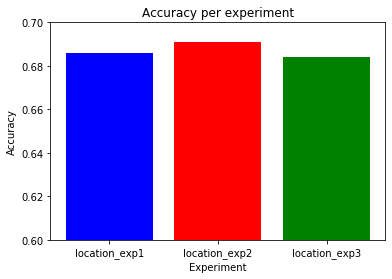

In [324]:
x_axis = []
y_axis = []
for key in accuracy_locationexperiment_results.keys():
    x_axis.append(key)
    y_axis.append(accuracy_locationexperiment_results[key]['accuracy'])
plt.bar(x_axis, y_axis,color=['blue','red','green'])
plt.title('Accuracy per experiment')
plt.xlabel('Experiment')
plt.ylabel('Accuracy')
plt.ylim(0.6, 0.7)
plt.show()

In [315]:
# la variable seleccionada es neogib y se agrega la infortmacón de reviers

In [316]:
df_withsentiment = df_withsentiment.drop(['zipcode','neighbourhood_cleansed'],axis=1)

In [317]:
df_without_originalreviews = df_withsentiment.drop(['number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
                      'review_scores_checkin','review_scores_communication','review_scores_location',
                      'review_scores_value'],axis=1)

In [318]:
# tercer experimento sin varaibles originales de review y solo las calculadas con aws y con esto se determino mejor
#variable ubibacion , mejor variable calificacion, con lo seleccionado se hace ultimo analisis de cuanto
#un modelo por dimension, probar variacion, concluir con importancia de vriables

In [319]:
dict_sentiment_experiment = {'withsentiment':df_withsentiment,'withoutsentiment':df_location_exp2,
                             'without_originalreviews':df_without_originalreviews}

In [320]:
dict_sentiment_experiment = dummi_variables_multipledfs(dict_sentiment_experiment)

In [321]:
accuracy_sentiment_experiment_results = experiment_randomforestclassifier(dict_sentiment_experiment,40)

In [322]:
accuracy_sentiment_experiment_results

{'withsentiment': {'accuracy': 0.6814638783269964},
 'withoutsentiment': {'accuracy': 0.6933460076045627},
 'without_originalreviews': {'accuracy': 0.6888149556400507}}

In [323]:
select_df = dict_sentiment_experiment['withoutsentiment'].copy()

In [129]:
category_toclean = ["host_verifications","amenities","property_type","room_type","bed_type"]
dummies_toremove = []
for dummy in select_df.columns:
    category = dummy.split("-")[0]
    if category in category_toclean:
        dummies_toremove.append(dummy)

In [130]:
reduce_select_df = select_df.drop(dummies_toremove,axis=1)

In [131]:
dict_reduce_experiment = {'complete_df':select_df,'reduce_df':reduce_select_df}

In [132]:
accuracy_reduce_experiment_results = experiment_randomforestclassifier(dict_reduce_experiment,40)

In [133]:
accuracy_reduce_experiment_results

{'complete_df': {'accuracy': 0.5839670468948037},
 'reduce_df': {'accuracy': 0.5831749049429658}}

In [134]:
reduce_select_df

,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,occupation_percentage,host_response_time-within a day,host_response_time-within a few hours,host_response_time-within an hour,host_response_time-nan,host_isin_city,host_is_superhost-t,host_has_profile_pic-t,host_identity_verified-t,instant_bookable-t,cancellation_policy-moderate,cancellation_policy-strict,cancellation_policy-super_strict_30,require_guest_profile_picture-t,require_guest_phone_verification-t
0,100.000000,100.000000,1,42.286241,-71.134374,2,1.0,1.0,1.0,65.0,0,0.0,2,15,36,94.0,10.0,9.0,10.0,10.0,9.000000,9.0,1,0,0,1,0,1,0,1,1,1,1,0,0,0,0
1,100.000000,88.000000,1,42.292438,-71.135765,2,1.0,1.0,1.0,65.0,1,20.0,3,45,41,98.0,10.0,9.0,10.0,10.0,9.000000,10.0,1,0,1,0,0,1,1,1,1,0,1,0,0,1,0
3,100.000000,100.000000,1,42.284512,-71.136258,2,1.5,1.0,2.0,79.0,1,0.0,2,31,29,99.0,10.0,10.0,10.0,10.0,9.000000,10.0,1,0,0,1,0,1,1,1,1,0,0,0,0,0,0
4,100.000000,95.000000,2,42.291690,-71.131893,2,1.0,1.0,1.0,75.0,1,0.0,2,1125,8,100.0,10.0,10.0,10.0,10.0,9.000000,10.0,5,0,1,0,0,1,1,1,1,0,0,0,0,0,0
5,98.000000,96.000000,5,42.281390,-71.131190,3,1.0,1.0,2.0,100.0,1,25.0,1,1125,57,90.0,10.0,10.0,10.0,10.0,9.000000,9.0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2807,100.000000,100.000000,8,42.358198,-71.129016,2,2.0,1.0,1.0,75.0,0,0.0,1,1125,32,97.0,10.0,10.0,10.0,10.0,9.000000,10.0,2,0,0,1,0,1,0,1,1,1,0,0,0,0,0
2808,95.354642,84.726792,1,42.352880,-71.125119,1,1.0,1.0,1.0,28.0,1,10.0,7,1125,5,96.0,10.0,10.0,10.0,10.0,10.000000,10.0,5,0,0,0,1,1,0,1,1,0,0,1,0,0,0
2809,95.354642,84.726792,1,42.352014,-71.140472,4,1.0,1.0,2.0,75.0,2,35.0,2,6,1,100.0,8.0,10.0,10.0,10.0,8.000000,8.0,5,0,0,0,1,1,0,1,1,0,0,0,0,0,0
2810,95.354642,84.726792,1,42.347206,-71.134339,2,1.0,1.0,1.0,129.0,1,0.0,1,1125,2,100.0,10.0,10.0,10.0,10.0,9.423768,10.0,5,0,0,0,1,1,0,1,1,0,0,0,0,0,0


In [57]:
#Split data into an X matrix and a response vector y
y = select_df['occupation_percentage']
x = select_df.drop('occupation_percentage', axis=1)
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
#Create a Gaussian Classifier
rfc=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(x_train,y_train)
# Generate prediction
y_pred=rfc.predict(x_test)
# Obtain accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
# features
feature_importance = pd.Series(rfc.feature_importances_,index=list(x.columns)).sort_values(ascending=False)

In [58]:
accuracy

0.5918884664131813

In [61]:
dict(feature_importance)

{'host_total_listings_count': 0.05313137796796363,
 'number_of_reviews': 0.05057374215480185,
 'reviews_per_month': 0.047563098709122495,
 'latitude': 0.047096972608921615,
 'longitude': 0.044605735940239616,
 'price': 0.04389238723248354,
 'host_acceptance_rate': 0.036687565788452725,
 'review_scores_rating': 0.03510109822011767,
 'extra_people': 0.023576624115468094,
 'maximum_nights': 0.02192182195493101,
 'accommodates': 0.021673366823050058,
 'minimum_nights': 0.020660621411982435,
 'host_response_rate': 0.020649171629973453,
 'review_scores_value': 0.015863886487663185,
 'host_response_time-nan': 0.015408215974170993,
 'guests_included': 0.014741228867076179,
 'review_scores_location': 0.013067075962240248,
 'review_scores_cleanliness': 0.013029634597610473,
 'bedrooms': 0.012774994621006501,
 'review_scores_accuracy': 0.012478032146160207,
 'beds': 0.012451567169283351,
 'cancellation_policy-strict': 0.010861364942817215,
 'review_scores_communication': 0.009891531027719624,
 'b

In [688]:
# if overfiting and a lot of noise amenities and verification so one try out

In [645]:
category_toclean = ["host_verifications","amenities","property_type","room_type","bed_type"]
dummies_toremove = []
for dummy in df_withsentiment.columns:
    category = dummy.split("-")[0]
    if category in category_toclean:
        dummies_toremove.append(dummy)

In [646]:
df_withsentiment_clean = df_withsentiment.drop(dummies_toremove,axis=1)

No handles with labels found to put in legend.


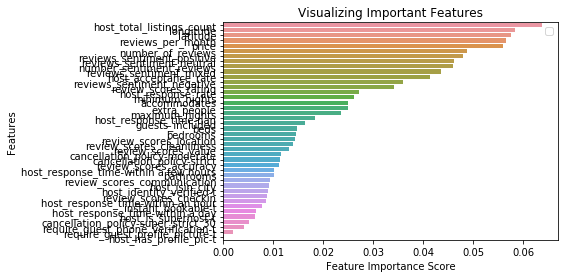

In [650]:
# Creating a bar plot
sns.barplot(x=feature_importance, y=feature_importance.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [681]:
cf_matrix = confusion_matrix(y_test,y_pred)

In [684]:
cf_matrix

array([[241,   6,   0,   1,  68],
       [ 43,   9,   0,   0,  23],
       [ 19,   0,  22,   1,  15],
       [ 29,   1,   5,   6,  39],
       [ 57,   0,   4,   7, 193]], dtype=int64)

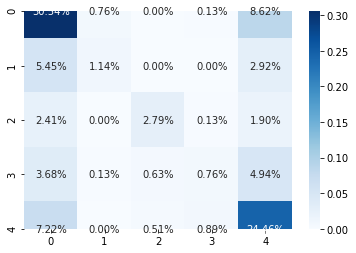

In [683]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

## Display the visualization of the Confusion Matrix.
plt.show()